In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
excel_file="sales_data.xlsx"
sales_df=pd.read_excel(excel_file, sheet_name="Sales")
customer_df=pd.read_excel(excel_file, sheet_name="Customers")
product_df=pd.read_excel(excel_file, sheet_name="Products")


In [3]:
sales_df.head()

,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region,TotalRevenue
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55


In [4]:
# ----------------------------------------
# Step 2: Data Cleaning (Excel-like "Format as Table")
# ----------------------------------------

# Remove duplicates
sales_df.drop_duplicates(inplace=True)

# Handle missing values (e.g., fill with 0)
sales_df["Quantity"].fillna(0, inplace=True)

# Convert OrderDate to datetime
sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])


C:\Users\HP\AppData\Local\Temp\ipykernel_8776\1175547894.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["Quantity"].fillna(0, inplace=True)


In [5]:
# SUMIF: Calculate Total Revenue (Quantity * Price)
sales_df["TotalRevenue"] = sales_df["Quantity"] * sales_df["Price"]

In [6]:
# ----------------------------------------
# Step 4: PivotTables (Excel-like Summarization)
# ----------------------------------------

# Create a PivotTable: Total Revenue by Region and Product
pivot_table = pd.pivot_table(
    sales_df,
    values="TotalRevenue",
    index="Region",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

print("\nPivotTable (Revenue by Region & Product):")
display(pivot_table)


PivotTable (Revenue by Region & Product):


Product,Keyboard,Laptop,Monitor,Smartphone,Tablet
Region,,,,,
East,2496402.98,2325639.45,2650384.26,2561689.35,2503484.71
North,2621697.05,2652925.56,2241453.22,2472203.75,3010931.54
South,2695977.84,2626530.41,2652228.88,2726864.73,2769039.61
West,2786048.14,2570569.77,2888205.42,2673185.67,2591883.76


In [9]:
# VLOOKUP: Merge Customer Name into Sales Data
sales_df = pd.merge(sales_df, customer_df, on="CustomerID", how="left")

# VLOOKUP: Merge Product Price into Sales Data
sales_df = pd.merge(sales_df, product_df[["Product", "Price"]], on="Product", how="left")

C:\Users\HP\AppData\Local\Temp\ipykernel_8776\335110993.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)


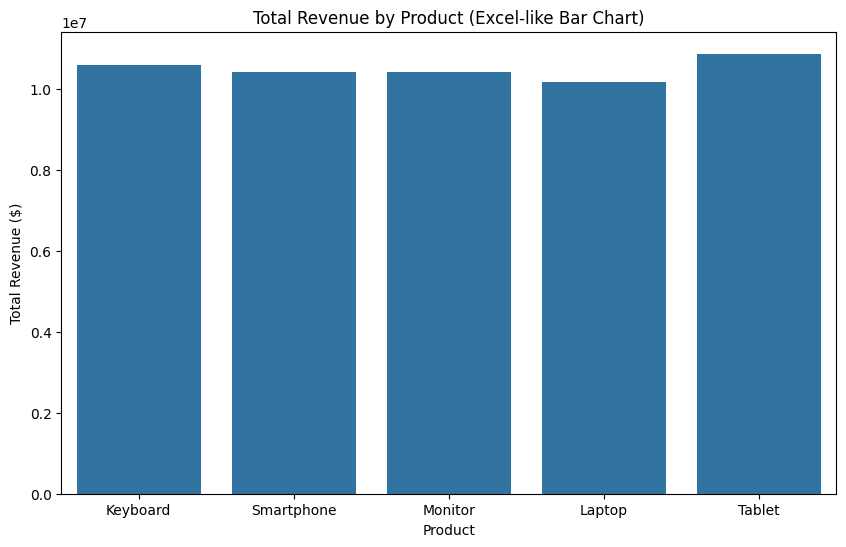

In [10]:
# ----------------------------------------
# Step 5: Visualization (Excel-like Charts)
# ----------------------------------------

# Bar Chart: Total Revenue by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)
plt.title("Total Revenue by Product (Excel-like Bar Chart)")
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.show()


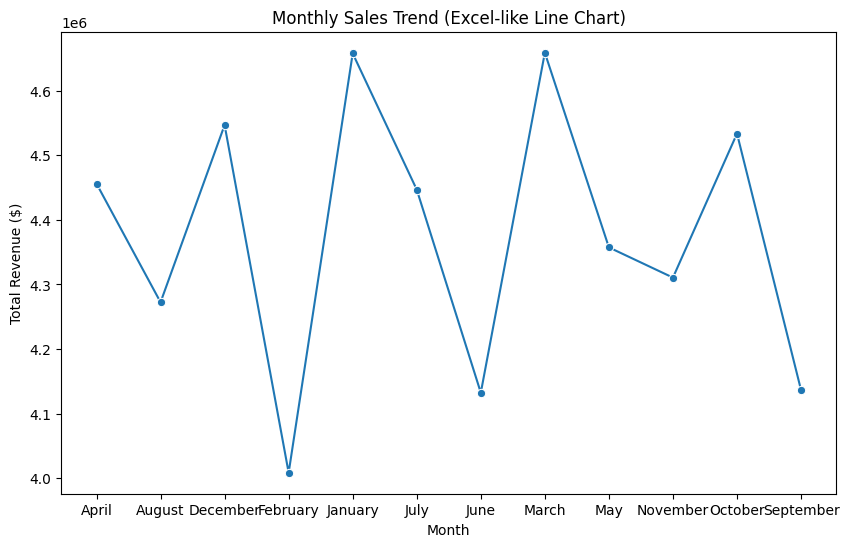

In [11]:
# Line Chart: Monthly Sales Trend
sales_df["Month"] = sales_df["OrderDate"].dt.month_name()
monthly_sales = sales_df.groupby("Month")["TotalRevenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="Month", y="TotalRevenue", marker="o")
plt.title("Monthly Sales Trend (Excel-like Line Chart)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.show()


In [25]:
monthly_sales

,Month,TotalRevenue
4,January,4657754.89
3,February,4008408.30
7,March,4658836.31
0,April,4456071.49
8,May,4357369.21
6,June,4132309.50
5,July,4446805.16
1,August,4272412.91
11,September,4136379.44
10,October,4533604.50


In [12]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [13]:
monthly_sales["Month"] = pd.Categorical(
    monthly_sales["Month"], categories=month_order, ordered=True
)

# Sort the DataFrame by Month
monthly_sales = monthly_sales.sort_values("Month")

<Axes: xlabel='Month', ylabel='TotalRevenue'>

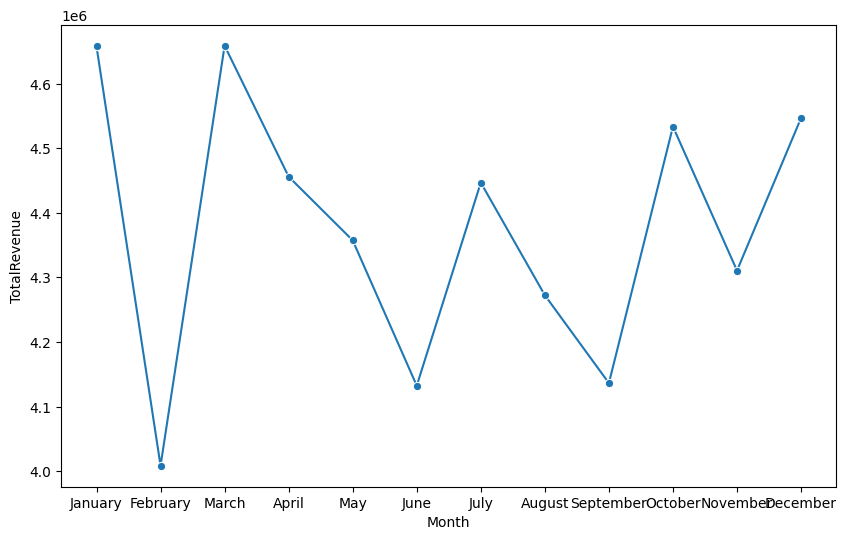

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales,x="Month",y="TotalRevenue",marker="o")

In [15]:
with pd.ExcelWriter("analysis_results.xlsx") as writer:
    sales_df.to_excel(writer, sheet_name="Processed Sales", index=False)
    pivot_table.to_excel(writer, sheet_name="PivotTable")